In [1]:
import os
from math import pi
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime.fake_provider import FakeArmonkV2

from utils import export_data_json, generate_output_dir, generate_full_file_path

In [2]:
OUTPUT_PATH = os.path.join(os.getcwd(), 'rotation-surppression-tests')
generate_output_dir(OUTPUT_PATH)

Creating folder: /home/alexandre/projects/scientific-research-2-qec-and-qem/src/rotation-surppression-tests


In [3]:
backend = FakeArmonkV2()
pm = generate_preset_pass_manager(optimization_level=3, backend=backend)

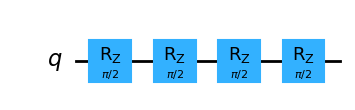

<IPython.core.display.Latex object>

In [4]:
circuit = QuantumCircuit(1)
circuit.rz(pi/2,0)
circuit.rz(pi/2,0)
circuit.rz(pi/2,0)
circuit.rz(pi/2,0)
display(circuit.draw('mpl', filename=generate_full_file_path(OUTPUT_PATH, "base-circuit.png")))
Statevector(circuit).draw('latex')

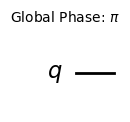

<IPython.core.display.Latex object>

In [5]:
surppressed = pm.run([circuit])[0]
display(surppressed.draw('mpl', filename=generate_full_file_path(OUTPUT_PATH, "surppressed-successive-rz(base-circuit).png")))
Statevector(surppressed).draw('latex')

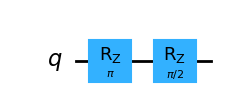

<IPython.core.display.Latex object>

In [6]:
circuit = QuantumCircuit(1)
circuit.rz(pi,0)
circuit.rz(pi/2,0)
display(circuit.draw('mpl', filename=generate_full_file_path(OUTPUT_PATH, "base-circuit-combine-rotations.png")))
Statevector(circuit).draw('latex')

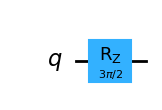

<IPython.core.display.Latex object>

In [7]:
surppressed = pm.run([circuit])[0]
display(surppressed.draw('mpl', filename=generate_full_file_path(OUTPUT_PATH, "surppressed-successive-rz-combining-angles.png")))
Statevector(surppressed).draw('latex')